In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/PRAKTIKUM/PRAKTIKUM7/DATA/'

In [ ]:
df = pd.read_csv(path + "apples_and_oranges.csv")
df

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
df.isnull().sum()

,0
Weight,0
Size,0
Class,0


In [ ]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Class'].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
# 1. Pemetaan kolom Class -> biner (apple=1, orange=0)
map_class = {'apple': 1, 'orange': 0}
df['Class_bin'] = df['Class'].map(map_class).astype('Int64')

print("Distribusi Class_bin:\n", df['Class_bin'].value_counts())

Distribusi Class_bin:
 Class_bin
0    20
1    20
Name: count, dtype: Int64


In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Weight,Size,Class_bin
Weight,1.000000,0.765027,0.849528
Size,0.765027,1.000000,0.900641
Class_bin,0.849528,0.900641,1.000000


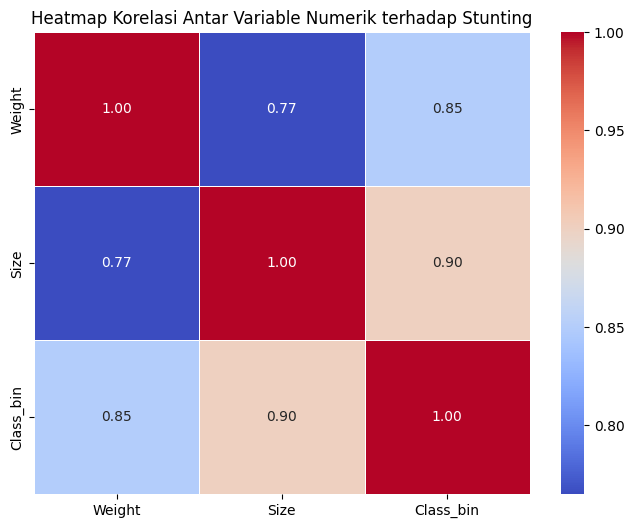

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variable Numerik terhadap Stunting", fontsize=12)
plt.show()

In [ ]:
# Fitur numerik
feature_num = ['Weight', 'Size']

# Gabungkan & drop missing
use_cols = feature_num + ['Class_bin']
df_model = df[use_cols].dropna().copy()

X = df_model[feature_num]
y = df_model['Class_bin']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Output:
# X shape: (100000, 4)
# y shape: (100000,)

X shape: (40, 2)
y shape: (40,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (32, 2)
Data uji: (8, 2)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# 1. Muat dan Persiapkan Data
dfdf = pd.read_csv(path + "apples_and_oranges.csv")
map_class = {'apple': 1, 'orange': 0}
df['Class_bin'] = df['Class'].map(map_class).astype('Int64')

# 2. Definisikan Features dan Target
feature_num = ['Weight', 'Size'] # Fitur numerik
X = df[feature_num]
y = df['Class_bin']

# 3. Bagi Data Menjadi Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4. Inisialisasi Preprocessing
# Scale hanya fitur numerik
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
    ],
    remainder='drop'
)

# 5. Inisialisasi Model
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

# 6. Buat Pipeline
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# 7. Latih Model
clf.fit(X_train, y_train)
print("✅ Model Logistic Regression trained successfully on the apples_and_oranges dataset.")

✅ Model Logistic Regression trained successfully on the apples_and_oranges dataset.


In [ ]:
# Prediction & probability
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Calculate metrics
print(f"Akurasi    : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision  : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall     : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-Score   : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC    : {roc_auc_score(y_test, y_prob):.4f}")

Akurasi    : 1.0000
Precision  : 1.0000
Recall     : 1.0000
F1-Score   : 1.0000
ROC-AUC    : 1.0000


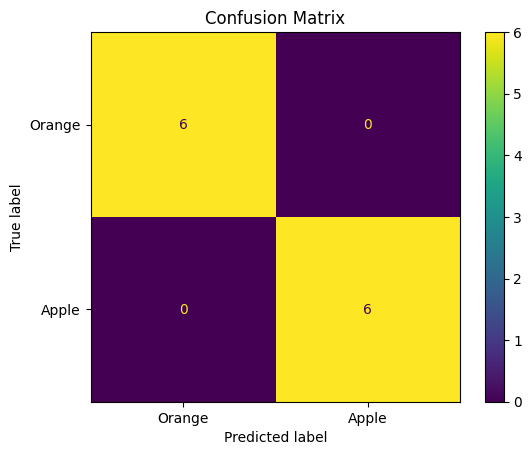

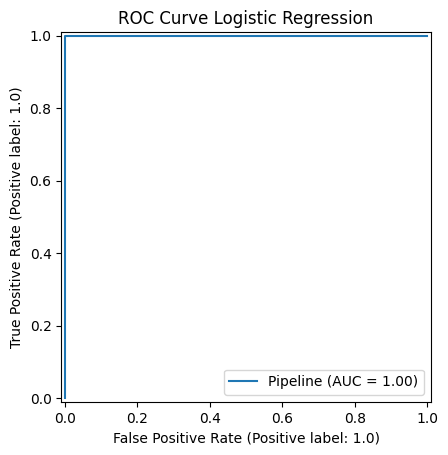

In [ ]:

# --- Visualisasi (Langkah Terakhir Anda) ---
# 1. Prediksi
y_pred = clf.predict(X_test)

# 2. Confusion Matrix
# display_labels disesuaikan menjadi ['Orange', 'Apple']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Orange', 'Apple'])

fig_cm, ax_cm = plt.subplots()
disp.plot(values_format='d', ax=ax_cm)
ax_cm.set_title("Confusion Matrix")
plt.show()

# 3. ROC Curve
fig_roc, ax_roc = plt.subplots()
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc)
ax_roc.set_title("ROC Curve Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Apple (0)', 'Orange (1)']))

              precision    recall  f1-score   support

   Apple (0)       1.00      1.00      1.00         6
  Orange (1)       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross validation (cv=5 berarti 5-fold)
scores = cross_val_score(clf, X, y, cv=5)

# Tampilkan hasil
print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [1. 1. 1. 1. 1.]
Rata-rata akurasi: 1.0
Standar deviasi: 0.0


In [ ]:
# Ambil nama fitur & koefisien
feat_names = feature_num
coeffs = clf.named_steps['model'].coef_[0]
odds = np.exp(coeffs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coeffs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

# display(coef_df)
print(coef_df)

    Fitur  Koefisien (log-odds)  Odds Ratio (e^coef)
1    Size              1.643314             5.172281
0  Weight              1.450669             4.265967
